# load model 

In [ ]:
#git clone https://86534ec60fa40cd641e0b22eb3dd5180c3661050@git.aistudio.baidu.com/guoheidan/sd15.git

In [ ]:
#cat v1-5-pruned-emaonly.z0* v1-5-pruned-emaonly.zip > full_archive.zip
#unzip full_archive.zip

In [8]:
#!pip install pytorch-lightning


In [1]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())


True
1


In [1]:
import torch 
input_file='../models/sd15models/v1-5-pruned-emaonly.ckpt'
device = 'cpu'
original_model = torch.load(input_file, map_location=device,
                             weights_only = False)
oriModelDict = original_model['state_dict']

/home/aistudio/external-libraries/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
oriModelDict['betas'].shape

torch.Size([1000])

In [2]:
import StableDiffusion.ModelConverter
from StableDiffusion.DiffusionProcess import DiffusionProcess
device = 'cuda'
idleDevice = 'cpu'
#diffusionDict = StableDiffusion.ModelConverter.load_from_standard_weights(input_file='./models/inkpunk-diffusion-v1.ckpt',\
#                                                            device = 'cuda')
diffusionDict = StableDiffusion.ModelConverter.load_from_standard_weights(input_file='../models/sd15models/v1-5-pruned-emaonly.ckpt',\
                                                            device = 'cuda')
clipWeights=diffusionDict['clip']
diffusionWeights = diffusionDict['diffusion']
vaeEncoderWeights = diffusionDict['encoder']
vaeDecoderWeights = diffusionDict['decoder']



import torch 
import StableDiffusion.VaeEncoder 
import StableDiffusion.VaeDecoder
import StableDiffusion.ClipEncoder
import StableDiffusion.DiffusionProcess
import importlib
importlib.reload(StableDiffusion.VaeEncoder)
importlib.reload(StableDiffusion.VaeDecoder)
importlib.reload(StableDiffusion.ClipEncoder)
importlib.reload(StableDiffusion.DiffusionProcess)
from StableDiffusion.VaeDecoder import VaeDecoder
from StableDiffusion.VaeEncoder import VaeEncoder
from StableDiffusion.ClipEncoder import ClipEncoder
from StableDiffusion.DiffusionProcess import DiffusionProcess
clipEncoder = ClipEncoder().to(device)
vaeEncoder = VaeEncoder().to(device)
vaeDecoder = VaeDecoder().to(device)
diffusionProcess = DiffusionProcess().to(device)
clipEncoder.load_state_dict(clipWeights,strict=True)
vaeEncoder.load_state_dict(vaeEncoderWeights ,strict=True)
vaeDecoder.load_state_dict(vaeDecoderWeights,strict=True)
diffusionProcess.load_state_dict(diffusionWeights,strict=True)
clipName = clipEncoder.__class__.__name__
print(clipName)


ClipEncoder


In [4]:
for k,v in vaeEncoder.named_parameters():
    print(k,v.shape)

0.weight torch.Size([128, 3, 3, 3])
0.bias torch.Size([128])
1.groupnorm_1.weight torch.Size([128])
1.groupnorm_1.bias torch.Size([128])
1.conv_1.weight torch.Size([128, 128, 3, 3])
1.conv_1.bias torch.Size([128])
1.groupnorm_2.weight torch.Size([128])
1.groupnorm_2.bias torch.Size([128])
1.conv_2.weight torch.Size([128, 128, 3, 3])
1.conv_2.bias torch.Size([128])
2.groupnorm_1.weight torch.Size([128])
2.groupnorm_1.bias torch.Size([128])
2.conv_1.weight torch.Size([128, 128, 3, 3])
2.conv_1.bias torch.Size([128])
2.groupnorm_2.weight torch.Size([128])
2.groupnorm_2.bias torch.Size([128])
2.conv_2.weight torch.Size([128, 128, 3, 3])
2.conv_2.bias torch.Size([128])
3.weight torch.Size([128, 128, 3, 3])
3.bias torch.Size([128])
4.groupnorm_1.weight torch.Size([128])
4.groupnorm_1.bias torch.Size([128])
4.conv_1.weight torch.Size([256, 128, 3, 3])
4.conv_1.bias torch.Size([256])
4.groupnorm_2.weight torch.Size([256])
4.groupnorm_2.bias torch.Size([256])
4.conv_2.weight torch.Size([256, 25

In [2]:
for k,v in clipEncoder.named_parameters():
    print(k,v.shape)

embedding.position_embedding torch.Size([77, 768])
embedding.token_embedding.weight torch.Size([49408, 768])
layers.0.layernorm_1.weight torch.Size([768])
layers.0.layernorm_1.bias torch.Size([768])
layers.0.attention.in_proj.weight torch.Size([2304, 768])
layers.0.attention.out_proj.weight torch.Size([768, 768])
layers.0.attention.out_proj.bias torch.Size([768])
layers.0.layernorm_2.weight torch.Size([768])
layers.0.layernorm_2.bias torch.Size([768])
layers.0.linear_1.weight torch.Size([3072, 768])
layers.0.linear_1.bias torch.Size([3072])
layers.0.linear_2.weight torch.Size([768, 3072])
layers.0.linear_2.bias torch.Size([768])
layers.1.layernorm_1.weight torch.Size([768])
layers.1.layernorm_1.bias torch.Size([768])
layers.1.attention.in_proj.weight torch.Size([2304, 768])
layers.1.attention.out_proj.weight torch.Size([768, 768])
layers.1.attention.out_proj.bias torch.Size([768])
layers.1.layernorm_2.weight torch.Size([768])
layers.1.layernorm_2.bias torch.Size([768])
layers.1.linear_

In [3]:
for k,v in diffusionProcess.named_parameters():
    print(k,v.shape)

time_embedding.linear_1.weight torch.Size([1280, 320])
time_embedding.linear_1.bias torch.Size([1280])
time_embedding.linear_2.weight torch.Size([1280, 1280])
time_embedding.linear_2.bias torch.Size([1280])
unet.encoders.0.0.weight torch.Size([320, 4, 3, 3])
unet.encoders.0.0.bias torch.Size([320])
unet.encoders.1.0.groupnorm_feature.weight torch.Size([320])
unet.encoders.1.0.groupnorm_feature.bias torch.Size([320])
unet.encoders.1.0.conv_feature.weight torch.Size([320, 320, 3, 3])
unet.encoders.1.0.conv_feature.bias torch.Size([320])
unet.encoders.1.0.linear_time.weight torch.Size([320, 1280])
unet.encoders.1.0.linear_time.bias torch.Size([320])
unet.encoders.1.0.groupnorm_merged.weight torch.Size([320])
unet.encoders.1.0.groupnorm_merged.bias torch.Size([320])
unet.encoders.1.0.conv_merged.weight torch.Size([320, 320, 3, 3])
unet.encoders.1.0.conv_merged.bias torch.Size([320])
unet.encoders.1.1.groupnorm.weight torch.Size([320])
unet.encoders.1.1.groupnorm.bias torch.Size([320])
unet

In [ ]:
import torch 
import matplotlib.pyplot as plt 
import StableDiffusion.VaeEncoder 
import StableDiffusion.VaeDecoder 

import importlib 
importlib.reload(StableDiffusion.VaeEncoder) 
importlib.reload(StableDiffusion.VaeDecoder) 
from StableDiffusion.VaeEncoder import VaeEncoder,VaeResidualBlock,VaeGlobalSelfAttention
from StableDiffusion.VaeDecoder import VaeDecoder 

seed = 420
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

latent= torch.randn(1,4,64,64).to(device)
reconLatent= vaeDecoder(latent)
print(reconLatent.shape)
img = reconLatent.permute(0,2,3,1).detach().cpu().numpy()[0]
img = (img+1)/2
img = img.clip(0,1)
plt.imshow(img)
plt.show()


torch.Size([1, 3, 512, 512])


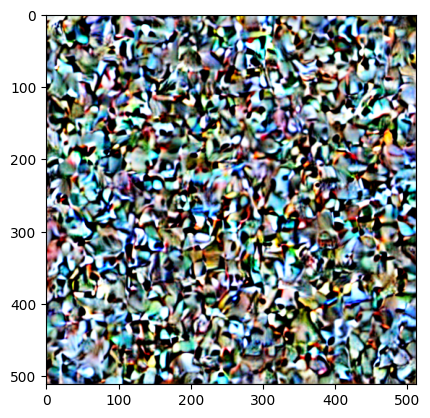

In [4]:
seed = 4200
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

latent= torch.randn(1,4,64,64).to(device)
reconLatent= vaeDecoder(latent)
print(reconLatent.shape)
img = reconLatent.permute(0,2,3,1).detach().cpu().numpy()[0]
img = (img+1)/2
img = img.clip(0,1)
plt.imshow(img)
plt.show()

In [5]:
import torch
vaeEncoderDict = vaeEncoder.state_dict()
vaeDecoderDict = vaeDecoder.state_dict()
clipEncoderDict = clipEncoder.state_dict()
diffusionProcessDict = diffusionProcess.state_dict()
for k,v in vaeEncoderWeights.items():
    original =vaeEncoderWeights[k]
    coded = vaeEncoderDict[k]
    if torch.allclose(original,coded):
        print(f'matched encoder {k,v.shape}')
    else:
        print(f'not matched encoder {k,v.shape}')
    

for k,v in vaeDecoderWeights.items():
    original =vaeDecoderWeights[k]
    coded = vaeDecoderDict[k]
    if torch.allclose(original,coded):
        print(f'matched decoder {k,v.shape}')
    else:
        print(f'not matched {k,v.shape}')

for k,v in clipWeights.items():
    original =clipWeights[k]
    coded = clipEncoderDict[k]
    if torch.allclose(original,coded):
        print(f'matched clip Encoder {k,v.shape}')
    else:
        print(f'not matched clip Encoder {k,v.shape}')


for k,v in diffusionWeights.items():
    original =diffusionWeights[k]
    coded = diffusionProcessDict[k]
    if torch.allclose(original,coded):
        print(f'matched diffusion process {k,v.shape}')
    else:
        print(f'not matched diffusion process {k,v.shape}')

    

matched encoder ('0.weight', torch.Size([128, 3, 3, 3]))
matched encoder ('0.bias', torch.Size([128]))
matched encoder ('1.groupnorm_1.weight', torch.Size([128]))
matched encoder ('1.groupnorm_1.bias', torch.Size([128]))
matched encoder ('1.conv_1.weight', torch.Size([128, 128, 3, 3]))
matched encoder ('1.conv_1.bias', torch.Size([128]))
matched encoder ('1.groupnorm_2.weight', torch.Size([128]))
matched encoder ('1.groupnorm_2.bias', torch.Size([128]))
matched encoder ('1.conv_2.weight', torch.Size([128, 128, 3, 3]))
matched encoder ('1.conv_2.bias', torch.Size([128]))
matched encoder ('2.groupnorm_1.weight', torch.Size([128]))
matched encoder ('2.groupnorm_1.bias', torch.Size([128]))
matched encoder ('2.conv_1.weight', torch.Size([128, 128, 3, 3]))
matched encoder ('2.conv_1.bias', torch.Size([128]))
matched encoder ('2.groupnorm_2.weight', torch.Size([128]))
matched encoder ('2.groupnorm_2.bias', torch.Size([128]))
matched encoder ('2.conv_2.weight', torch.Size([128, 128, 3, 3]))
ma

In [7]:
a = torch.ones(5,5)
a = a.triu(-1)
print(a)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1.]])


In [8]:
for k,v in vaeEncoderDict.items():
    #original = diffusionDict[k]
    #coded = vaeEncoderDict[k]
    print(f'original: {k,v.shape}')

original: ('0.weight', torch.Size([128, 3, 3, 3]))
original: ('0.bias', torch.Size([128]))
original: ('1.groupnorm_1.weight', torch.Size([128]))
original: ('1.groupnorm_1.bias', torch.Size([128]))
original: ('1.conv_1.weight', torch.Size([128, 128, 3, 3]))
original: ('1.conv_1.bias', torch.Size([128]))
original: ('1.groupnorm_2.weight', torch.Size([128]))
original: ('1.groupnorm_2.bias', torch.Size([128]))
original: ('1.conv_2.weight', torch.Size([128, 128, 3, 3]))
original: ('1.conv_2.bias', torch.Size([128]))
original: ('2.groupnorm_1.weight', torch.Size([128]))
original: ('2.groupnorm_1.bias', torch.Size([128]))
original: ('2.conv_1.weight', torch.Size([128, 128, 3, 3]))
original: ('2.conv_1.bias', torch.Size([128]))
original: ('2.groupnorm_2.weight', torch.Size([128]))
original: ('2.groupnorm_2.bias', torch.Size([128]))
original: ('2.conv_2.weight', torch.Size([128, 128, 3, 3]))
original: ('2.conv_2.bias', torch.Size([128]))
original: ('3.weight', torch.Size([128, 128, 3, 3]))
orig

In [7]:
for k,v in vaeEncoderDict.items():
    #original = diffusionDict[k]
    coded = vaeEncoderDict[k]
    print(f'coded: {k,v.shape}')


coded: ('0.weight', torch.Size([128, 3, 3, 3]))
coded: ('0.bias', torch.Size([128]))
coded: ('1.groupnorm_1.weight', torch.Size([128]))
coded: ('1.groupnorm_1.bias', torch.Size([128]))
coded: ('1.conv_1.weight', torch.Size([128, 128, 3, 3]))
coded: ('1.conv_1.bias', torch.Size([128]))
coded: ('1.groupnorm_2.weight', torch.Size([128]))
coded: ('1.groupnorm_2.bias', torch.Size([128]))
coded: ('1.conv_2.weight', torch.Size([128, 128, 3, 3]))
coded: ('1.conv_2.bias', torch.Size([128]))
coded: ('2.groupnorm_1.weight', torch.Size([128]))
coded: ('2.groupnorm_1.bias', torch.Size([128]))
coded: ('2.conv_1.weight', torch.Size([128, 128, 3, 3]))
coded: ('2.conv_1.bias', torch.Size([128]))
coded: ('2.groupnorm_2.weight', torch.Size([128]))
coded: ('2.groupnorm_2.bias', torch.Size([128]))
coded: ('2.conv_2.weight', torch.Size([128, 128, 3, 3]))
coded: ('2.conv_2.bias', torch.Size([128]))
coded: ('3.weight', torch.Size([128, 128, 3, 3]))
coded: ('3.bias', torch.Size([128]))
coded: ('4.groupnorm_1.w

torch.Size([1, 3, 512, 512])


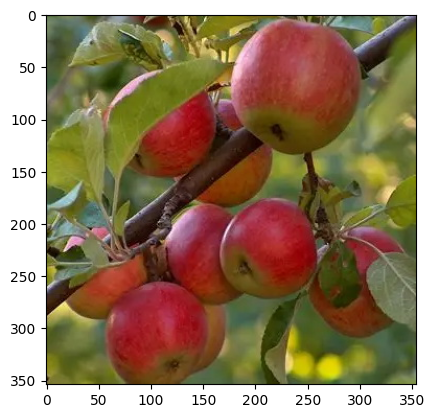

noise device: cuda:0
vaeEncoder.device cuda:0
vae encoder input noise.shape torch.Size([1, 4, 64, 64])
encoderImg.shape torch.Size([1, 4, 64, 64])
decoderImg.shapetorch.Size([1, 3, 512, 512])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.07580972..0.96792454].


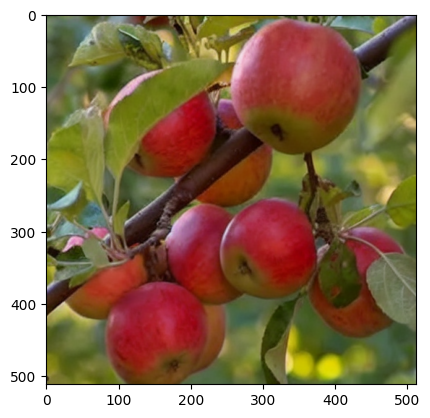

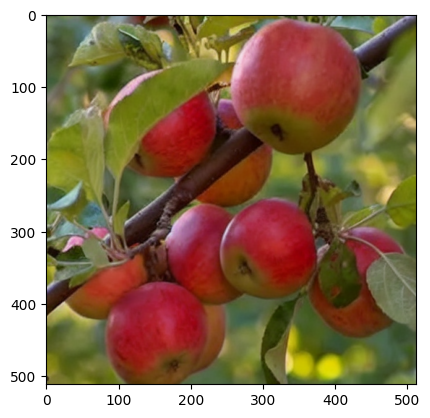

In [6]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from torchvision import transforms
import StableDiffusion.ModelConverter
import StableDiffusion.VaeEncoder
import StableDiffusion.Utils
import importlib
importlib.reload(StableDiffusion.VaeEncoder)
importlib.reload(StableDiffusion.VaeDecoder)
importlib.reload(StableDiffusion.Utils)
from StableDiffusion.VaeEncoder import VaeEncoder
from StableDiffusion.VaeDecoder import VaeDecoder
from StableDiffusion.Utils import Utils
seed = 420
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
#img1 = cv2.imread('./images/pusiyue_front_1024_1024.jpg')
img1 = cv2.imread('./images/apple.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
preprocess = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((512,512)),
                transforms.ToTensor(),   # (0 255) -> (-1, 1)
                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])# 
                ])
imgTensor = preprocess(img1)
imgBatch = imgTensor[None, :, :, :]
print(imgBatch.shape)
plt.imshow(img1)
plt.show()


vaeEncoder.eval()
vaeDecoder.eval()
with torch.no_grad():
    imgBatch = imgBatch.to(device)
    noise = torch.randn(1,4,64,64,device=device,dtype=torch.float32)
    noise[:,:,0:10,0:10] = 0.0
    print(f'noise device: {noise.device}')
    print(f'vaeEncoder.device {next(vaeEncoder.parameters()).device}')
    #imgBatch = torch.zeros_like(imgBatch,device=device)
    encoderImg =vaeEncoder(imgBatch,(noise))
    #encoderImg = torch.randn_like(encoderImg,device=device)
    #encoderImg[:,0:2,0:1,0:10]=1.0
    #encoderImg = torch.randint_like(encoderImg,0,1,device=device)
    decoderImgTensor = vaeDecoder(encoderImg)
    decoderImg = decoderImgTensor



print(f'encoderImg.shape {encoderImg.shape}')
print(f'decoderImg.shape{decoderImg.shape}')
decoderImg = decoderImg.detach().cpu().numpy()
decoderTest = decoderImg[0,:,:,:].transpose(1,2,0)
decoderTest =Utils.rescaleImageRange(decoderTest,[-1,1],[0,1],True)
decoderImg = (decoderImg[0].transpose(1,2,0)+1)/2
plt.imshow(decoderImg)
plt.show()
plt.imshow(decoderTest)
plt.show()

torch.Size([1, 3, 512, 512])


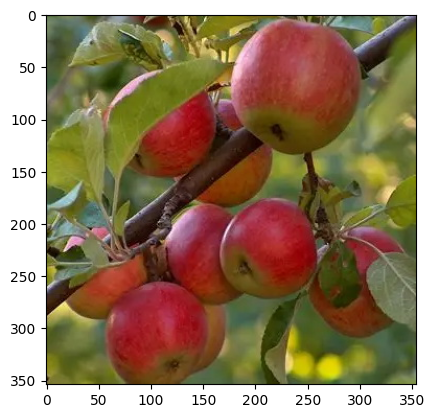

noise device: cuda:0
vaeEncoder.device cuda:0
vae encoder input noise.shape torch.Size([1, 4, 64, 64])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.075809..0.96792436].


encoderImg.shape torch.Size([1, 4, 64, 64])
decoderImg.shapetorch.Size([1, 3, 512, 512])


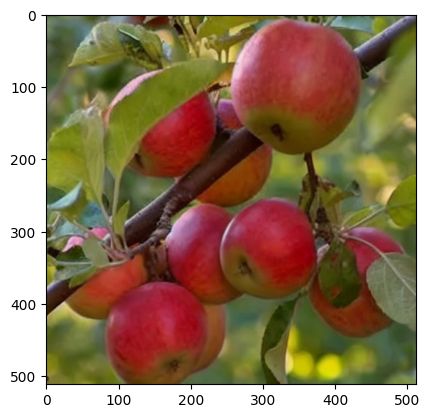

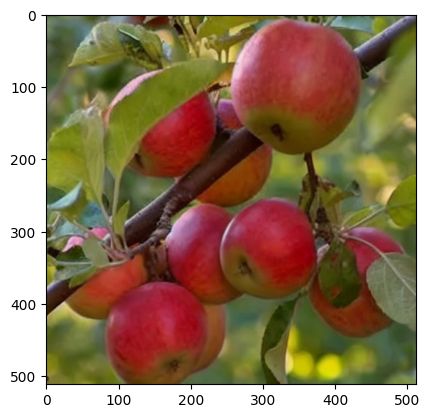

In [7]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from torchvision import transforms
import StableDiffusion.ModelConverter
import StableDiffusion.VaeEncoder
import StableDiffusion.Utils
import importlib
importlib.reload(StableDiffusion.VaeEncoder)
importlib.reload(StableDiffusion.VaeDecoder)
importlib.reload(StableDiffusion.Utils)
from StableDiffusion.VaeEncoder import VaeEncoder
from StableDiffusion.VaeDecoder import VaeDecoder
from StableDiffusion.Utils import Utils
seed = 420
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
#img1 = cv2.imread('./images/pusiyue_front_1024_1024.jpg')
img1 = cv2.imread('./images/apple.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
preprocess = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((512,512)),
                transforms.ToTensor(),   # (0 255) -> (-1, 1)
                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])# 
                ])
imgTensor = preprocess(img1)
imgBatch = imgTensor[None, :, :, :]
print(imgBatch.shape)
plt.imshow(img1)
plt.show()


vaeEncoder.eval()
vaeDecoder.eval()
with torch.no_grad():
    imgBatch = imgBatch.to(device)
    noise = torch.randn(1,4,64,64,device=device,dtype=torch.float32)
    #noise[:,:,0:10,0:10] = 0.0
    noise = noise * 0
    print(f'noise device: {noise.device}')
    print(f'vaeEncoder.device {next(vaeEncoder.parameters()).device}')
    #imgBatch = torch.zeros_like(imgBatch,device=device)
    encoderImg =vaeEncoder(imgBatch,(noise))
    #encoderImg = torch.randn_like(encoderImg,device=device)
    #encoderImg[:,0:2,0:1,0:10]=1.0
    #encoderImg = torch.randint_like(encoderImg,0,1,device=device)
    decoderImgTensor = vaeDecoder(encoderImg)
    decoderImg = decoderImgTensor



print(f'encoderImg.shape {encoderImg.shape}')
print(f'decoderImg.shape{decoderImg.shape}')
decoderImg = decoderImg.detach().cpu().numpy()
decoderTest = decoderImg[0,:,:,:].transpose(1,2,0)
decoderTest =Utils.rescaleImageRange(decoderTest,[-1,1],[0,1],True)
decoderImg = (decoderImg[0].transpose(1,2,0)+1)/2
plt.imshow(decoderImg)
plt.show()
plt.imshow(decoderTest)
plt.show()

vae encoder input noise is none  use zeros
latent shape: torch.Size([1, 4, 64, 64])
recon shape: torch.Size([1, 3, 512, 512])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-18.38509..15.481552].


recon decoderImg are not close enough
lantentAdjust and encoderImg are not close enough
latentAdjust: tensor([[[[ 1.7192e-01,  6.0010e-01,  7.2184e-01,  ...,  1.4841e-01,
            1.5338e+00, -6.2163e-01],
          [ 1.1334e+00,  5.3249e-01,  2.2546e-01,  ..., -1.3564e-01,
            3.6130e-01, -9.5934e-01],
          [ 1.2289e+00,  4.3948e-01,  2.1174e-01,  ..., -4.6087e-01,
           -2.0623e-01,  2.8131e-01],
          ...,
          [ 9.1047e-01,  1.3917e+00,  6.5224e-01,  ...,  6.8984e-01,
           -4.5585e-01,  1.8584e-01],
          [-5.8642e-01,  9.0837e-01,  6.5362e-01,  ...,  1.1709e+00,
            9.5349e-01,  4.3146e-01],
          [ 1.2745e+00,  4.3153e-01,  3.6953e-01,  ...,  6.6034e-01,
            6.1031e-01,  4.7078e-01]],

         [[-7.7597e-01, -3.5183e-01,  2.0857e-01,  ..., -1.4956e+00,
            9.4655e-01, -2.2721e-01],
          [ 3.3214e-01,  1.2536e-02, -1.3218e+00,  ..., -1.7156e-01,
           -8.6818e-01, -1.0309e+00],
          [-4.2929e-01, -

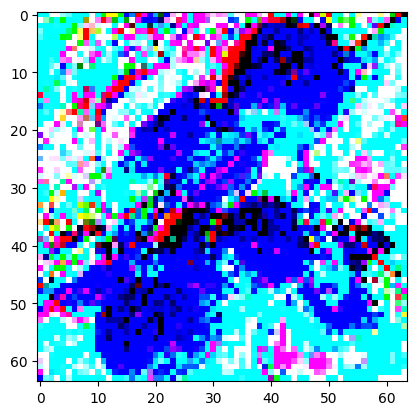

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.08333194..0.9707893].


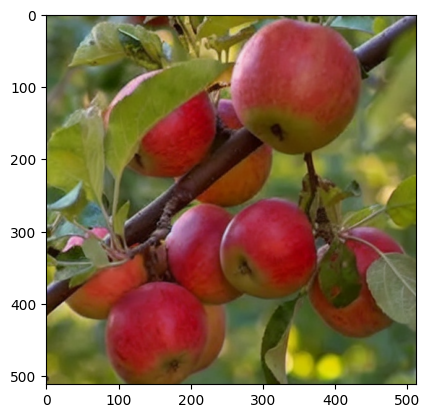

In [18]:
from diffusers import AutoencoderKL
import torch
import StableDiffusion.Utils
import StableDiffusion.VaeDecoder
import StableDiffusion.VaeEncoder
import importlib 
importlib.reload(StableDiffusion.Utils)
importlib.reload(StableDiffusion.VaeDecoder)
importlib.reload(StableDiffusion.VaeEncoder)

from StableDiffusion.Utils import Utils
from StableDiffusion.VaeEncoder import VaeEncoder
from StableDiffusion.VaeDecoder import VaeDecoder

seed = 420
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
# Path to folder
vaePath = "../models/sd15vae/"

# Load model
vaeModel = AutoencoderKL.from_pretrained(
    vaePath,
    use_safetensors=True,      # tells Diffusers to load safetensors
    torch_dtype=torch.float32  # optional: faster and matches SD usually
)


# Example random image
x = torch.randn(1, 3, 512, 512).cuda()  # SD1.5 works with 512x512 images
x = imgBatch.to("cuda")
# Move to GPU
vaeModel = vaeModel.to("cuda")
vaeModel.eval()  # important for inference
vaeEncoder.eval()
vaeDecoder.eval()
with torch.no_grad():
    seed = 420
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    encoderImg = vaeEncoder(x,None)
    decoderImgTensor = vaeDecoder(encoderImg)
    seed = 420
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    latent = vaeModel.encode(x).latent_dist.sample()  # encode to latent   
    recon = vaeModel.decode(latent).sample          # decode back to image

print("latent shape:", latent.shape)  # [1, 4, 64, 64]
print("recon shape:", recon.shape)    # [1, 3, 512, 512]
if torch.allclose(recon, decoderImgTensor,atol=0.15):
    print('recon decoderImg are close enough')
else:
    print('recon decoderImg are not close enough')
latentAdjust = latent*0.18125
if torch.allclose(latentAdjust, encoderImg, atol=0.2):
    print('latentAdjust and encoderImg are close enough')
else:
    print('lantentAdjust and encoderImg are not close enough')

#print(torch.max(latentAdjust,dim=1))
#print(torch.max(encoderImg,dim=1))
print(f'latentAdjust: {latentAdjust}')
print(f'encoderImg: {encoderImg}')


print(torch.max(recon,dim=1))
print(torch.max(decoderImgTensor,dim=1))
print(f'recon: {recon}')
print(f'decoderImgTensor: {decoderImgTensor}')




latentImg = latent[0:,1:,:,:]
print(latentImg.shape)
Utils.showBatchImage(latentImg)
Utils.showBatchImage(recon)


# torch version DdpmSampler

In [2]:
import torch
from transformers import CLIPTokenizer

clipEncoder.eval()
with torch.no_grad():
    prompt = [#'a girl walking on a Chrismas street in a snowing day', \
             #'a woman holding two stuffed rabbits in front of a christmas tree',      
            #'a cat sitting by window while snow falls from the sky',
           #'a girl playing with a cat in a snowing day',
           'a girl'
           
            ]
    promptNegative = ['blur, ugly, bad, poor']    
    
    promptTokenizer = CLIPTokenizer(vocab_file='../models/sd15models/vocab.json',merges_file='../models/sd15models/merges.txt')
    promptTokens = promptTokenizer(prompt,padding='max_length',max_length=77,truncation=True,return_tensors='pt')['input_ids'].to(device)
    promptNegativeTokens = promptTokenizer(promptNegative,padding='max_length',max_length=77,truncation=True,return_tensors='pt')['input_ids'].to(device) 
    attentionMask = promptTokenizer(prompt,padding='max_length',max_length=77,truncation=True,return_tensors='pt')['attention_mask'].to(device)
    print(attentionMask)
    clipInputs =promptTokens
    print(clipInputs)
    clipInputsNegative = promptNegativeTokens
    clipOutputsPositive = clipEncoder(clipInputs,attentionMask)
    clipOutputsNegative = clipEncoder(clipInputsNegative,attentionMask)    
    #print(clipOutputs)

tensor([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0]], device='cuda:0')
tensor([[49406,   320,  1611, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407]], device='cuda:0')
token embedding shape torch.Size([1, 77, 768])
token embedding shape torch.Size([1, 

In [28]:
import torch
from transformers import CLIPTokenizer, CLIPTextModel

modelPath = "../models/openai-clip-vit-large-patch14"

# 1. Load Tokenizer and Model
tokenizer = CLIPTokenizer.from_pretrained(modelPath)
openaiClipModel = CLIPTextModel.from_pretrained(modelPath).to(device)

# 2. Prepare text
prompt = prompt
inputs = tokenizer(
    prompt, 
    padding="max_length", 
    max_length=77, 
    truncation=True, 
    return_tensors="pt"
)


inputs = {k: v.to(device) for k, v in inputs.items()}
for k, v in inputs.items():
    print(k,v.shape)

inputIds = inputs['input_ids']
attentionMask = inputs['attention_mask']
print(inputIds)
print(attentionMask)

openaiClipModel.eval()
# 3. Forward Pass
with torch.no_grad():
    outputs = openaiClipModel(**inputs)

# last_hidden_state shape: [batch_size, sequence_length, hidden_size]
# For SD 1.5, this is [1, 77, 768]
text_embeddings = outputs.last_hidden_state

print(text_embeddings.shape)


input_ids torch.Size([1, 77])
attention_mask torch.Size([1, 77])
tensor([[49406,   320,  1611, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407]], device='cuda:0')
tensor([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0]], device='cuda:0')
torch.Size([1, 77, 

In [7]:
for k,v in openaiClipModel.named_parameters():
    print(k,v.shape)

for k,v in clipEncoder.named_parameters():
    print(k,v.shape)

text_model.embeddings.token_embedding.weight torch.Size([49408, 768])
text_model.embeddings.position_embedding.weight torch.Size([77, 768])
text_model.encoder.layers.0.self_attn.k_proj.weight torch.Size([768, 768])
text_model.encoder.layers.0.self_attn.k_proj.bias torch.Size([768])
text_model.encoder.layers.0.self_attn.v_proj.weight torch.Size([768, 768])
text_model.encoder.layers.0.self_attn.v_proj.bias torch.Size([768])
text_model.encoder.layers.0.self_attn.q_proj.weight torch.Size([768, 768])
text_model.encoder.layers.0.self_attn.q_proj.bias torch.Size([768])
text_model.encoder.layers.0.self_attn.out_proj.weight torch.Size([768, 768])
text_model.encoder.layers.0.self_attn.out_proj.bias torch.Size([768])
text_model.encoder.layers.0.layer_norm1.weight torch.Size([768])
text_model.encoder.layers.0.layer_norm1.bias torch.Size([768])
text_model.encoder.layers.0.mlp.fc1.weight torch.Size([3072, 768])
text_model.encoder.layers.0.mlp.fc1.bias torch.Size([3072])
text_model.encoder.layers.0.m

In [29]:
import torch
print(text_embeddings.dtype,text_embeddings.shape)
print(clipOutputsPositive.dtype,clipOutputsPositive.shape)

print(f'openai clip encoder {text_embeddings}')
print(f'clip outputs {clipOutputsPositive}')

for i in range(77):
    
    if torch.allclose(text_embeddings[0,i,:], clipOutputsPositive[0,i,:],atol=0.1):
        print('ok')
    else:
        print('no ok')


print(text_embeddings[0,4,:20])

print(clipOutputsPositive[0,4,:20])




torch.float32 torch.Size([1, 77, 768])
torch.float32 torch.Size([1, 77, 768])
openai clip encoder tensor([[[-0.3884,  0.0229, -0.0522,  ..., -0.4899, -0.3066,  0.0675],
         [ 0.0290, -1.3258,  0.3085,  ..., -0.5257,  0.9768,  0.6652],
         [ 0.6254, -0.7442, -0.2879,  ..., -0.8919, -1.2004, -1.5125],
         ...,
         [ 0.0848, -0.2872, -0.2406,  ..., -0.7158, -0.3493, -0.1181],
         [-0.0197, -0.2304, -0.1976,  ..., -0.6602, -0.3259, -0.0862],
         [ 0.2567, -0.3430, -0.3041,  ..., -0.7837, -0.4053, -0.1816]]],
       device='cuda:0')
clip outputs tensor([[[-0.3884,  0.0229, -0.0522,  ..., -0.4899, -0.3066,  0.0675],
         [ 0.0290, -1.3258,  0.3085,  ..., -0.5257,  0.9768,  0.6652],
         [ 0.6254, -0.7442, -0.2879,  ..., -0.8919, -1.2004, -1.5125],
         ...,
         [ 0.0848, -0.2872, -0.2406,  ..., -0.7158, -0.3493, -0.1181],
         [-0.0197, -0.2304, -0.1976,  ..., -0.6602, -0.3259, -0.0862],
         [ 0.2567, -0.3430, -0.3041,  ..., -0.7837, -0

latent shape: torch.Size([1, 4, 64, 64])
recon shape: torch.Size([1, 3, 512, 512])


In [17]:
timestep=10
timestep = torch.tensor([timestep], dtype=torch.float32)
timestep = timestep[:,None]
print(timestep.shape)

freqs = torch.pow(10000, -torch.arange(start=0, end=160, dtype=torch.float32) / 160) 
print(freqs)
freqs = freqs[ None]
print(freqs.shape)

torch.Size([1, 1])
tensor([1.0000e+00, 9.4406e-01, 8.9125e-01, 8.4140e-01, 7.9433e-01, 7.4989e-01,
        7.0795e-01, 6.6834e-01, 6.3096e-01, 5.9566e-01, 5.6234e-01, 5.3088e-01,
        5.0119e-01, 4.7315e-01, 4.4668e-01, 4.2170e-01, 3.9811e-01, 3.7584e-01,
        3.5481e-01, 3.3497e-01, 3.1623e-01, 2.9854e-01, 2.8184e-01, 2.6607e-01,
        2.5119e-01, 2.3714e-01, 2.2387e-01, 2.1135e-01, 1.9953e-01, 1.8836e-01,
        1.7783e-01, 1.6788e-01, 1.5849e-01, 1.4962e-01, 1.4125e-01, 1.3335e-01,
        1.2589e-01, 1.1885e-01, 1.1220e-01, 1.0593e-01, 1.0000e-01, 9.4406e-02,
        8.9125e-02, 8.4140e-02, 7.9433e-02, 7.4989e-02, 7.0795e-02, 6.6834e-02,
        6.3096e-02, 5.9566e-02, 5.6234e-02, 5.3088e-02, 5.0119e-02, 4.7315e-02,
        4.4668e-02, 4.2170e-02, 3.9811e-02, 3.7584e-02, 3.5481e-02, 3.3497e-02,
        3.1623e-02, 2.9854e-02, 2.8184e-02, 2.6607e-02, 2.5119e-02, 2.3714e-02,
        2.2387e-02, 2.1135e-02, 1.9953e-02, 1.8836e-02, 1.7783e-02, 1.6788e-02,
        1.5849e-02, 1

In [24]:
def get_time_embedding(timestep):
    # Shape: (160,)
    freqs = torch.pow(10000, -torch.arange(start=0, end=160, dtype=torch.float32) / 160) 
    # Shape: (1, 160)
    x = torch.tensor([timestep], dtype=torch.float32)[:, None] * freqs[None]
    # Shape: (1, 160 * 2)
    return torch.cat([torch.cos(x), torch.sin(x)], dim=-1)



a = get_time_embedding(10)

from StableDiffusion.Utils import Utils
b = Utils.getTimeEmbedding(10)
tensorB = torch.from_numpy(b).to(torch.float32)
if torch.allclose(a, tensorB,atol=0.02):
    print('ok')

print(b[0,:10])
print(a[0,:10])

    




ok
[-0.83907153 -0.9998747  -0.87163479 -0.5311606  -0.08918207  0.34762744
  0.69937578  0.9209621   0.99965185  0.94715021]
tensor([-0.8391, -0.9999, -0.8716, -0.5312, -0.0892,  0.3476,  0.6994,  0.9210,
         0.9997,  0.9472])


In [3]:
from diffusers import UNet2DConditionModel
from safetensors.torch import load_file

# 1. Load the configuration (defines the architecture)
unet = UNet2DConditionModel.from_config("../models/sd15unet/config.json")

# 2. Load the actual weights from the safetensors file
state_dict = load_file("../models/sd15unet/diffusion_pytorch_model.safetensors")

# 3. Inject the weights into the model
unet.load_state_dict(state_dict)

# 4. Move to GPU and set to evaluation mode
unet.to("cuda").eval()

/home/aistudio/external-libraries/lib/python3.10/site-packages/diffusers/configuration_utils.py:250: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a model, please use <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.load_config(...) followed by <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.from_config(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)


UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_fe

In [4]:
import torch
from transformers import CLIPTokenizer

clipEncoder.eval()
with torch.no_grad():
    prompt = [#'a girl walking on a Chrismas street in a snowing day', \
             #'a woman holding two stuffed rabbits in front of a christmas tree',      
            #'a cat sitting by window while snow falls from the sky',
           #'a girl playing with a cat in a snowing day',
           'a girl',
           #'some banana in a supermarket',
           
            ]
    promptNegative = ['blur, ugly, bad, poor']    
    
    promptTokenizer = CLIPTokenizer(vocab_file='../models/sd15models/vocab.json',merges_file='../models/sd15models/merges.txt')
    promptTokens = promptTokenizer(prompt,padding='max_length',max_length=77,truncation=True,return_tensors='pt')['input_ids'].to(device)
    promptNegativeTokens = promptTokenizer(promptNegative,padding='max_length',max_length=77,truncation=True,return_tensors='pt')['input_ids'].to(device) 
    attentionMask = promptTokenizer(prompt,padding='max_length',max_length=77,truncation=True,return_tensors='pt')['attention_mask'].to(device)
    print(attentionMask)
    clipInputs =promptTokens
    print(clipInputs)
    clipInputsNegative = promptNegativeTokens
    clipOutputsPositive = clipEncoder(clipInputs,attentionMask)
    clipOutputsNegative = clipEncoder(clipInputsNegative,attentionMask)

tensor([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0]], device='cuda:0')
tensor([[49406,   320,  1611, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407]], device='cuda:0')
token embedding shape torch.Size([1, 77, 768])
token embedding shape torch.Size([1, 

torch.Size([1, 3, 512, 512])


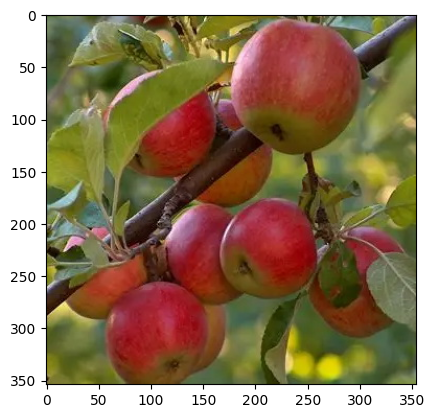

vae encoder input noise is none  use zeros


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-18.38509..21.588884].


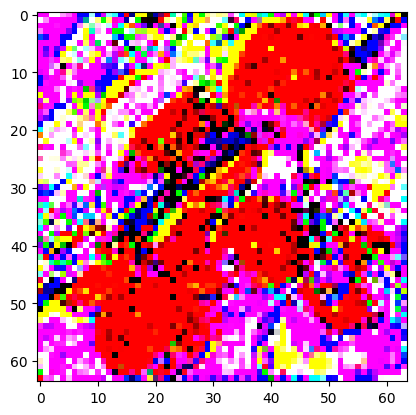

In [5]:
from diffusers import AutoencoderKL
import torch
import StableDiffusion.Utils
import StableDiffusion.VaeDecoder
import StableDiffusion.VaeEncoder
import importlib 
importlib.reload(StableDiffusion.Utils)
importlib.reload(StableDiffusion.VaeDecoder)
importlib.reload(StableDiffusion.VaeEncoder)

from StableDiffusion.Utils import Utils
from StableDiffusion.VaeEncoder import VaeEncoder
from StableDiffusion.VaeDecoder import VaeDecoder
imgBatch = Utils.loadImageBatch('./images/apple.jpg')
seed = 420
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
# Path to folder
vaePath = "../models/sd15vae/"

# Load model
vaeModel = AutoencoderKL.from_pretrained(
    vaePath,
    use_safetensors=True,      # tells Diffusers to load safetensors
    torch_dtype=torch.float32  # optional: faster and matches SD usually
)


# Example random image
x = torch.randn(1, 3, 512, 512).cuda()  # SD1.5 works with 512x512 images

x = imgBatch.to("cuda")
# Move to GPU
vaeModel = vaeModel.to("cuda")
vaeModel.eval()  # important for inference
vaeEncoder.eval()
vaeDecoder.eval()
with torch.no_grad():
    seed = 420
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    encoderImg = vaeEncoder(x,None)
    decoderImgTensor = vaeDecoder(encoderImg)
    seed = 420
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    latent = vaeModel.encode(x).latent_dist.sample()  # encode to latent   
    recon = vaeModel.decode(latent).sample          # decode back to image

Utils.showBatchImage(latent[:,0:3,:,:])

In [ ]:
print(unet.time_embedding)

In [9]:
from diffusers import UNet2DConditionModel
from safetensors.torch import load_file

# 1. Load the configuration (defines the architecture)
unet = UNet2DConditionModel.from_config("../models/sd15unet/config.json")

# 2. Load the actual weights from the safetensors file
state_dict = load_file("../models/sd15unet/diffusion_pytorch_model.safetensors")

# 3. Inject the weights into the model
unet.load_state_dict(state_dict)
unet.to(device)

/home/aistudio/external-libraries/lib/python3.10/site-packages/diffusers/configuration_utils.py:250: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a model, please use <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.load_config(...) followed by <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.from_config(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)


UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_fe

In [10]:
import torch

if 'handle' in globals():
    handle.remove()
# 1. Container to store the result
time_data = {}

# 2. Define the Hook Function
def capture_time_emb(module, input, output):
    # output is the result of the 1280-dim MLP
    time_data['final_embedding'] = output.detach()
    time_data['input'] = input[0].detach()

# 3. Register the hook to the UNet's time_embedding block
handle = unet.time_embedding.register_forward_hook(capture_time_emb)

# 4. Helper function to map an INT to an EMBEDDING
def map_int_to_emb(timestep_int):
    # Prepare the input tensor
    t_tensor = torch.tensor([timestep_int]).to(unet.device)
    
    # We must run a dummy pass through the UNet to trigger the hook
    # We use very small dummy latents to save memory
    dummy_latents = torch.zeros((1, 4, 64, 64)).to(unet.device)
    dummy_context = torch.zeros((1, 77, 768)).to(unet.device)
    
    with torch.no_grad():
        unet(dummy_latents, t_tensor, encoder_hidden_states=dummy_context)
    
    return time_data['final_embedding'],time_data['input']

# --- Execution ---
t_value = 500
embedding_500,input_500 = map_int_to_emb(t_value)

print(f"Int: {t_value} -> Mapping complete.")
print(f"Embedding Shape: {embedding_500.shape}") # [1, 1280]

# Cleanup
handle.remove()
print(embedding_500)

Int: 500 -> Mapping complete.
Embedding Shape: torch.Size([1, 1280])
tensor([[ 9.6139e-04, -8.9789e-05,  1.3159e-03,  ...,  2.1554e-02,
         -1.1794e-03, -8.8844e-04]], device='cuda:0')


In [12]:
from StableDiffusion.Utils import Utils
from StableDiffusion.TimeEmbedding import TimeEmbedding
time_500 = Utils.getTimeEmbedding(500)
time_500 = torch.from_numpy(time_500).float()

timeEmbedding = diffusionProcess.time_embedding(time_500.to(device))
if torch.allclose(timeEmbedding, embedding_500,atol=0.01):
    print('time embedding is correct')
    
print(timeEmbedding)
print(embedding_500)


print(time_500)
print(input_500)

time embedding is correct
tensor([[ 9.6139e-04, -8.9791e-05,  1.3159e-03,  ...,  2.1554e-02,
         -1.1794e-03, -8.8844e-04]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[ 9.6139e-04, -8.9789e-05,  1.3159e-03,  ...,  2.1554e-02,
         -1.1794e-03, -8.8844e-04]], device='cuda:0')
tensor([[-0.8838,  0.7028,  0.8867,  0.9622,  0.2448, -0.4558, -0.5173,  0.3965,
          0.2487, -0.8137, -0.0019,  0.0224,  0.7426, -0.5766, -0.9586, -0.9354,
         -0.4237,  0.8382,  0.0932, -0.5584,  0.5112,  0.0435, -0.8993,  0.4631,
          0.9976,  0.6882,  0.3982,  0.4179,  0.7194,  0.9979,  0.5822, -0.6350,
         -0.7617,  0.8329,  0.0589, -0.7631,  0.9935, -0.9651,  0.9014, -0.9029,
          0.9650, -0.9969,  0.8363, -0.3351, -0.4318,  0.9792, -0.6676, -0.4173,
          0.9913, -0.0620, -0.9877,  0.1586,  0.9973,  0.0955, -0.9417, -0.6166,
          0.4925,  0.9983,  0.4457, -0.5060, -0.9947, -0.7102,  0.0452,  0.7403,
          1.0000,  0.7587,  0.1967, -0.4152, -0.8517, -1.0

In [6]:
import torch
from transformers import CLIPTokenizer

clipEncoder.eval()
with torch.no_grad():
    prompt = [#'a girl walking on a Chrismas street in a snowing day', \
             #'a woman holding two stuffed rabbits in front of a christmas tree',      
            #'a cat sitting by window while snow falls from the sky',
           #'a girl playing with a cat in a snowing day',
           'a girl walking on a Chrismas street in a snowing day',
           #'some banana in a supermarket',
           
            ]
    promptNegative = ['blur, ugly, bad, poor']    
    
    promptTokenizer = CLIPTokenizer(vocab_file='../models/sd15models/vocab.json',merges_file='../models/sd15models/merges.txt')
    promptTokens = promptTokenizer(prompt,padding='max_length',max_length=77,truncation=True,return_tensors='pt')['input_ids'].to(device)
    promptNegativeTokens = promptTokenizer(promptNegative,padding='max_length',max_length=77,truncation=True,return_tensors='pt')['input_ids'].to(device) 
    attentionMask = promptTokenizer(prompt,padding='max_length',max_length=77,truncation=True,return_tensors='pt')['attention_mask'].to(device)
    print(attentionMask)
    clipInputs =promptTokens
    print(clipInputs)
    clipInputsNegative = promptNegativeTokens
    clipOutputsPositive = clipEncoder(clipInputs,attentionMask)
    clipOutputsNegative = clipEncoder(clipInputsNegative,attentionMask)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0]], device='cuda:0')
tensor([[49406,   320,  1611,  3941,   525,   320,  9907,  1412,  2012,   530,
           320, 21443,   575, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407]], device='cuda:0')
token embedding shape torch.Size([1, 77, 768])
token embedding shape torch.Size([1, 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6710601..2.0586119].


torch.float32 torch.int64 torch.float32
torch.Size([1, 4, 64, 64]) torch.Size([1, 4, 64, 64])


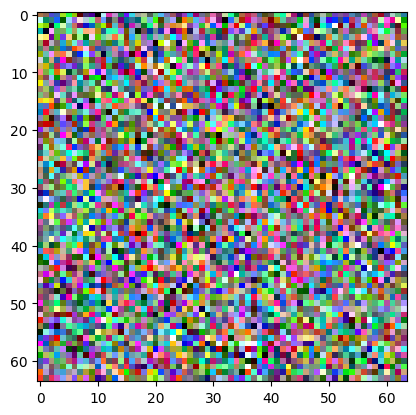

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6211557..1.976923].


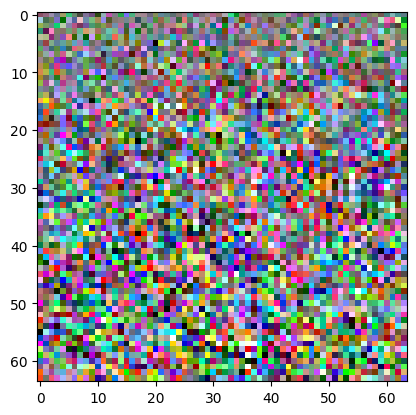

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5493572..1.3858244].


unet output: tensor([[[[ 0.3454,  0.1103, -0.3907,  ...,  0.3696, -0.2339, -0.6966],
          [ 0.5304, -0.9602, -0.5752,  ...,  0.8514,  1.3988, -0.9561],
          [ 0.3657,  0.0636, -0.6717,  ..., -0.8622, -0.3402, -0.3417],
          ...,
          [-0.2759,  0.3980,  0.0302,  ..., -2.2878,  0.1353, -0.4169],
          [ 2.4865,  0.4207, -0.0653,  ..., -0.4857,  0.2843,  0.6238],
          [ 1.1638, -0.2881,  0.8293,  ..., -0.4324,  0.1342, -0.0825]],

         [[-0.0875, -0.1812, -0.4124,  ...,  0.6497,  0.3967, -0.0147],
          [ 1.3770,  0.1184, -0.0090,  ..., -1.1593,  1.1046,  0.2659],
          [ 1.1774,  0.6694, -1.0296,  ..., -0.3518, -0.8962,  1.8330],
          ...,
          [-0.2973,  0.4628, -0.3580,  ...,  0.0391,  0.0208,  1.1753],
          [-0.1754,  0.2117, -0.4636,  ...,  0.2742, -1.4726,  0.2903],
          [-0.5537, -0.1951, -0.6241,  ...,  0.1413, -0.0475, -0.2810]],

         [[-0.4377, -0.3302,  0.6641,  ...,  0.5730, -0.0117,  0.2889],
          [ 2.082

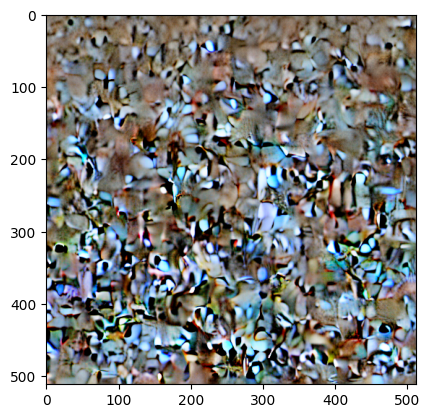

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.61960745..1.429925].


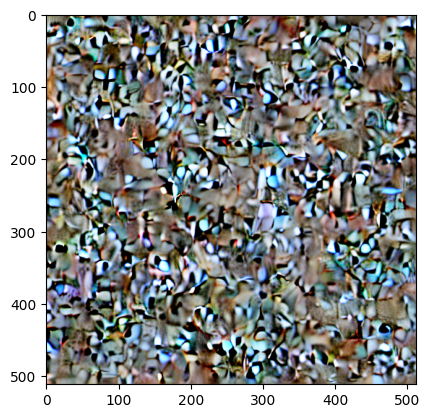

Input Latents Shape: torch.Size([1, 4, 64, 64])
Output Noise Shape: torch.Size([1, 4, 64, 64])


In [9]:

# 4. Move to GPU and set to evaluation mode
unet.to("cuda").eval()


# 1. Create dummy inputs matching SD 1.5 dimensions
batch_size = 1
latents = torch.randn((batch_size, 4, 64, 64)).to("cuda")     # The "Image"
#latents = encoderImg
t = 200
timestep = torch.tensor([t]).to("cuda")                     # Current step
timestepEmbedding = Utils.getTimeEmbedding(t)
timestepEmbedding =torch.from_numpy(timestepEmbedding).float().to(device)
context = torch.randn((batch_size, 77, 768)).to("cuda")      # Text prompt info
context = clipOutputsPositive
# 2. Forward Pass
with torch.no_grad():
    # The U-Net returns a 'UNet2DConditionOutput' object
    output = unet(
        sample=latents, 
        timestep=timestep, 
        encoder_hidden_states=context
    )
    print(latents.dtype,timestep.dtype,context.dtype)
    myOutput = diffusionProcess(latents,context,timestepEmbedding)


noise_pred = output.sample 
print(noise_pred.shape,myOutput.shape)

if torch.allclose(noise_pred, myOutput,atol=0.3):
    print(f'latents and myOutput are the same')
Utils.showBatchImage(noise_pred[:,0:3,:,:])
Utils.showBatchImage(myOutput[:,0:3,:,:])
print(f'unet output: {noise_pred}')
print(f'myOutput: {myOutput}')
# 3. Get the predicted noise

Utils.showBatchImage(vaeDecoder(myOutput))

Utils.showBatchImage(vaeDecoder(noise_pred))
print(f"Input Latents Shape: {latents.shape}")   # [1, 4, 64, 64]
print(f"Output Noise Shape: {noise_pred.shape}") # [1, 4, 64, 64]

In [7]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from torchvision import transforms
from tqdm import tqdm
import torch
from transformers import CLIPTokenizer
import numpy as np
from StableDiffusion.Utils import Utils
import matplotlib.pyplot as plt
import StableDiffusion.DdpmSamplerTorch
import StableDiffusion.TimeEmbedding
import importlib
importlib.reload(StableDiffusion.DdpmSamplerTorch)
importlib.reload(StableDiffusion.TimeEmbedding)
#importlib.reload(StableDiffusion.Utils)
from StableDiffusion.DdpmSamplerTorch import DdpmSamplerTorch
from StableDiffusion.TimeEmbedding import TimeEmbedding
import torch 
input_file='../models/sd15models/v1-5-pruned-emaonly.ckpt'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
original_model = torch.load(input_file, map_location=device,
                             weights_only = False)
oriModelDict = original_model['state_dict']



In [8]:
sqrt_alphas_cumprod = oriModelDict['sqrt_alphas_cumprod']
sqrt_one_minus_alphas_cumprod = oriModelDict['sqrt_one_minus_alphas_cumprod']
sqrt_recip_alphas_cumprod = oriModelDict['sqrt_recip_alphas_cumprod']
alphas_cumprod =    oriModelDict['alphas_cumprod']
alphas_cumprod_prev = oriModelDict['alphas_cumprod_prev']
betas= oriModelDict['betas']


In [15]:
alphaBar = alphas_cumprod
alphaBarPreT = torch.ones_like(alphas_cumprod)
alphaBarPreT[1:] = alphaBar[0:-1]
if torch.allclose(alphaBarPreT,alphas_cumprod_prev):
    print(f'alphaBarpreT is correct')
else:
    print(f'alphaBarpreT is incorrect')


alphaBarpreT is correct


In [13]:

print(f'alphas_cumprod {alphas_cumprod}')
print(f'alphas_cumprod_prev {alphas_cumprod_prev}')

alphas_cumprod tensor([0.9991, 0.9983, 0.9974, 0.9966, 0.9957, 0.9948, 0.9940, 0.9931, 0.9922,
        0.9913, 0.9904, 0.9895, 0.9886, 0.9877, 0.9868, 0.9859, 0.9850, 0.9841,
        0.9832, 0.9822, 0.9813, 0.9804, 0.9794, 0.9785, 0.9776, 0.9766, 0.9757,
        0.9747, 0.9737, 0.9728, 0.9718, 0.9708, 0.9698, 0.9689, 0.9679, 0.9669,
        0.9659, 0.9649, 0.9639, 0.9629, 0.9619, 0.9609, 0.9599, 0.9588, 0.9578,
        0.9568, 0.9557, 0.9547, 0.9537, 0.9526, 0.9516, 0.9505, 0.9495, 0.9484,
        0.9473, 0.9463, 0.9452, 0.9441, 0.9430, 0.9420, 0.9409, 0.9398, 0.9387,
        0.9376, 0.9365, 0.9354, 0.9343, 0.9332, 0.9320, 0.9309, 0.9298, 0.9287,
        0.9275, 0.9264, 0.9252, 0.9241, 0.9229, 0.9218, 0.9206, 0.9195, 0.9183,
        0.9171, 0.9160, 0.9148, 0.9136, 0.9124, 0.9112, 0.9100, 0.9089, 0.9077,
        0.9065, 0.9052, 0.9040, 0.9028, 0.9016, 0.9004, 0.8992, 0.8979, 0.8967,
        0.8955, 0.8942, 0.8930, 0.8917, 0.8905, 0.8892, 0.8880, 0.8867, 0.8854,
        0.8842, 0.8829, 0

In [20]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from torchvision import transforms
from tqdm import tqdm
import torch
from transformers import CLIPTokenizer
import numpy as np
from StableDiffusion.Utils import Utils
import matplotlib.pyplot as plt
import StableDiffusion.DdpmSamplerTorch
import StableDiffusion.TimeEmbedding
import importlib
importlib.reload(StableDiffusion.DdpmSamplerTorch)
importlib.reload(StableDiffusion.TimeEmbedding)
#importlib.reload(StableDiffusion.Utils)
from StableDiffusion.DdpmSamplerTorch import DdpmSamplerTorch
from StableDiffusion.TimeEmbedding import TimeEmbedding
seed = 1000
numInferenceSteps = 50
randomGenerator = torch.Generator(device=device)
randomGenerator.manual_seed(seed)
sampler = DdpmSamplerTorch(randomGenerator=randomGenerator,numTrainingSteps=1000,numInferenceSteps=numInferenceSteps)
sampler.to(device)
print(f'smapler inference steps {sampler.numInferenceSteps}')
print(f'sampler training steps {sampler.numTrainingSteps}')
print(f'smapler inference steps {sampler.inferenceTimeSteps}')
print(f'sampler training steps {sampler.trainingTimeSteps}')

if torch.allclose(sampler.alphaBarPreT,alphas_cumprod_prev):
    print(f'alphaBarpreT is correct')
else:
    print(f'alphaBarpreT is incorrect')
if torch.allclose(sampler.betas,betas):
    print(f'betas match')
else:
    print(f'betas do not match')


if torch.allclose(sampler.alphasBar,alphas_cumprod):
    print(f'alphas_cumprod matched')
else:
    print(f'alphas_cumprod not matched')

if torch.allclose(sampler.sqrtAlphasBar,sqrt_alphas_cumprod):
    print(f'sqrt_alphas_cumprod matched')
else:
    print(f'sqrt_alphas_cumprod not matched')


if torch.allclose(sampler.sqrtOneMinusAlphasBar,sqrt_one_minus_alphas_cumprod):
    print(f'sqrt_one_minus_alphas_cumprod matched')
else:
    print(f'sqrt_one_minus_alphas_cumprod')
print(f'alphas_cumprod{alphas_cumprod}')
print(f'sampler.alphasBar {sampler.alphasBar}')

print(f'sampler betas {sampler.betas}')
print(f'hg betas {betas}')

smapler inference steps 50
sampler training steps 1000
smapler inference steps tensor([980, 960, 940, 920, 900, 880, 860, 840, 820, 800, 780, 760, 740, 720,
        700, 680, 660, 640, 620, 600, 580, 560, 540, 520, 500, 480, 460, 440,
        420, 400, 380, 360, 340, 320, 300, 280, 260, 240, 220, 200, 180, 160,
        140, 120, 100,  80,  60,  40,  20,   0], device='cuda:0')
sampler training steps tensor([999, 998, 997, 996, 995, 994, 993, 992, 991, 990, 989, 988, 987, 986,
        985, 984, 983, 982, 981, 980, 979, 978, 977, 976, 975, 974, 973, 972,
        971, 970, 969, 968, 967, 966, 965, 964, 963, 962, 961, 960, 959, 958,
        957, 956, 955, 954, 953, 952, 951, 950, 949, 948, 947, 946, 945, 944,
        943, 942, 941, 940, 939, 938, 937, 936, 935, 934, 933, 932, 931, 930,
        929, 928, 927, 926, 925, 924, 923, 922, 921, 920, 919, 918, 917, 916,
        915, 914, 913, 912, 911, 910, 909, 908, 907, 906, 905, 904, 903, 902,
        901, 900, 899, 898, 897, 896, 895, 894, 893,

/home/aistudio/external-libraries/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([1, 3, 512, 512])


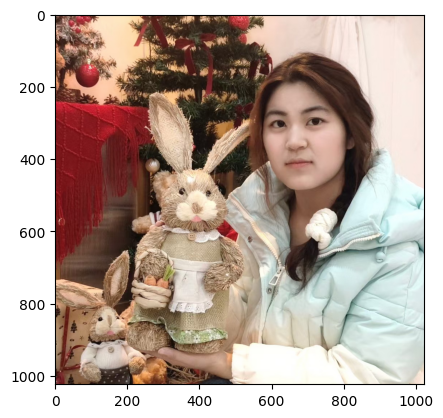

NameError: name 'device' is not defined

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from torchvision import transforms
from tqdm import tqdm
import torch
from transformers import CLIPTokenizer
import numpy as np
from StableDiffusion.Utils import Utils
import matplotlib.pyplot as plt
import StableDiffusion.DdpmSamplerTorch
import StableDiffusion.TimeEmbedding
import StableDiffusion.Utils
import importlib
importlib.reload(StableDiffusion.DdpmSamplerTorch)
importlib.reload(StableDiffusion.TimeEmbedding)
importlib.reload(StableDiffusion.Utils)
from StableDiffusion.DdpmSamplerTorch import DdpmSamplerTorch
from StableDiffusion.TimeEmbedding import TimeEmbedding
from StableDiffusion.Utils import Utils
#img1 = cv2.imread('./images/pusiyue_front_1024_1024.jpg')
#img1 = cv2.imread('./images/apple.jpg')
filePath = './images/apple.jpg'
filePath ='./images/pusiyue_front_1024_1024.jpg'
imgBatch = Utils.loadImageBatch(filePath)
Width = 512
Height = 512
LatentWidth = Width//8
LatentHeight = Height//8
LatentShape = (1,4,LatentHeight,LatentWidth)

inputImage = imgBatch
inputImage = None
isDoingCfg = False
numInferenceSteps = 50
cfgScale = 30
seed = 1000
randomGenerator = torch.Generator(device=device)
randomGenerator.manual_seed(seed)
sampler = DdpmSamplerTorch(randomGenerator=randomGenerator,
                           numTrainingSteps=1000,
                           numInferenceSteps=numInferenceSteps)
inputImage = imgBatch.to(device)
vaeEncoder.eval()
vaeDecoder.eval()
diffusionProcess.eval()
clipEncoder.eval()

with torch.no_grad():
    prompt = [#'a girl walking on a Chrismas street in a snowing day', \
             'a woman holding two stuffed rabbits in front of a christmas tree',      
            #'a cat sitting by window while snow falls from the sky',
           #'a girl playing with a cat in a snowing day'
            ]
    promptNegative = ['blur, ugly, bad, poor']    
    
    promptTokenizer = CLIPTokenizer(vocab_file='../models/sd15models/vocab.json',merges_file='../models/sd15models/merges.txt')
    promptTokens = promptTokenizer(prompt,padding='max_length',max_length=77,truncation=True,return_tensors='pt')['input_ids'].to(device)
    promptNegativeTokens = promptTokenizer(promptNegative,padding='max_length',max_length=77,truncation=True,return_tensors='pt')['input_ids'].to(device) 

    clipInputs =promptTokens
    clipInputsNegative = promptNegativeTokens
    clipOutputsPositive = clipEncoder(clipInputs)
    clipOutputsNegative = clipEncoder(clipInputsNegative)    
    #print(clipOutputs)
    if isDoingCfg == True:
        clipOutputs = torch.cat([clipOutputsPositive,clipOutputsNegative])
    else:
        clipOutputs = clipOutputsPositive
        
    
    if inputImage is not None:
        
        inputNoise =torch.randn(LatentShape,generator=randomGenerator,device=device)      
        #inputNoise = None
        latentNoised = vaeEncoder(inputImage,inputNoise)
        sampler.setAddNoiseStrength(0.5)
        time = sampler.getInferenceTimeSteps()[0].to(device)
        latentNoised = sampler.addNoise(latentNoised,time)
        imageDecodedDirect = vaeDecoder(latentNoised)       
        plt.imshow(latentNoised[0].detach().cpu().numpy().transpose(1,2,0))
        plt.show()
        
    else: 
        latentNoised = torch.randn(LatentShape,generator=randomGenerator).to(device)
    
    timesteps = sampler.getInferenceTimeSteps()        
    
    timesteps = tqdm(timesteps)
    print(f'timesteps{timesteps}')
    for i,time in enumerate(timesteps):
        print(f'i{i} time {time} {time.device}')
        timeNumpy = sampler.tensor2Numpy(time).astype(np.int32)        
        timeEmbedding320 = Utils.getTimeEmbedding(timeNumpy)    
        timeEmbedding320= sampler.numpy2Tensor(timeEmbedding320,device=device)
        modelNoisedLatentInput = latentNoised
        contextInput = clipOutputs
        if isDoingCfg == True:
            modelNoisedLatentInput = modelNoisedLatentInput.repeat(2,1,1,1) 
        
        print(f'type {modelNoisedLatentInput.device} {timeEmbedding320.device} {contextInput.device}')
        modelEstimatedNoiseInLatent  = diffusionProcess(modelNoisedLatentInput,contextInput,timeEmbedding320)
        
        if isDoingCfg == True:
            positiveEstimate,negativeEstimate = modelEstimatedNoiseInLatent.chunk(2,dim=0)
            #print(modelEstimatedNoiseInLatent.shape,positiveEstimate.shape,negativeEstimate.shape)
            modelEstimatedNoiseInLatent = cfgScale * positiveEstimate  + (1-cfgScale) * negativeEstimate
            #print(f'after cfg scale {positiveEstimate.shape} {negativeEstimate.shape} {modelEstimatedNoiseInLatent.shape}')
            
        

        #print(f'latent  noise  time input beforme remove noise  {modelNoisedLatentInputNumpy.shape} context input {contextInputNumpy.shape} time embedding {timeEmbedding320Numpy.shape}')
        cleanerLatent = sampler.removeNoiseFromLatent(modelNoisedLatentInput,modelEstimatedNoiseInLatent,time)        
        latentNoised  = cleanerLatent
        #print(f'latent input at the end while step {i} {latentNoised.shape}')
        
        #print(f'latent noised {latentNoised.shape} {latentNoised}')
        
        if i % 10 == 0:
            imageDecoded = vaeDecoder(latentNoised)         
            Utils.showBatchImage(imageDecoded)
        
    
    


    
    

torch.Size([1, 3, 512, 512])


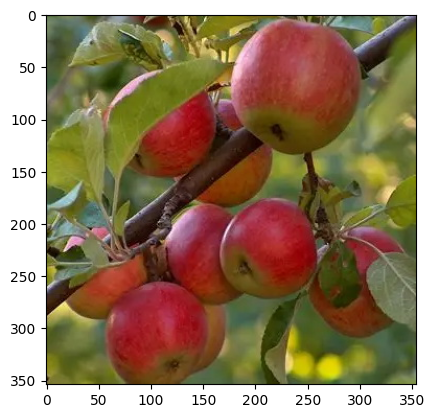

NameError: name 'vaeEncoder' is not defined

In [5]:

import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from torchvision import transforms
from tqdm import tqdm
import torch
from transformers import CLIPTokenizer
import numpy as np
from StableDiffusion.Utils import Utils
import matplotlib.pyplot as plt
import StableDiffusion.DdpmSamplerTorch
import StableDiffusion.TimeEmbedding
import importlib
importlib.reload(StableDiffusion.DdpmSamplerTorch)
importlib.reload(StableDiffusion.TimeEmbedding)
#importlib.reload(StableDiffusion.Utils)
from StableDiffusion.DdpmSamplerTorch import DdpmSamplerTorch
from StableDiffusion.TimeEmbedding import TimeEmbedding
#img1 = cv2.imread('./images/pusiyue_front_1024_1024.jpg')
img1 = cv2.imread('./images/apple.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
preprocess = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((512,512)),
                transforms.ToTensor(),   # (0 255) -> (-1, 1)
                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])# 
                ])
imgTensor = preprocess(img1)
imgBatch = imgTensor[None, :, :, :]
print(imgBatch.shape)
plt.imshow(img1)
plt.show()

Width = 512
Height = 512
LatentWidth = Width//8
LatentHeight = Height//8
LatentShape = (1,4,LatentHeight,LatentWidth)

inputImage = imgBatch
inputImage = None
isDoingCfg = False
numInferenceSteps = 50
cfgScale = 30
seed = 1000
randomGenerator = torch.Generator(device=device)
randomGenerator.manual_seed(seed)
sampler = DdpmSamplerTorch(randomGenerator=randomGenerator,numTrainingSteps=1000,numInferenceSteps=numInferenceSteps)
inputImage = imgBatch.to(device)
vaeEncoder.eval()
vaeDecoder.eval()
diffusionProcess.eval()
clipEncoder.eval()

with torch.no_grad():
    prompt = [#'a girl walking on a Chrismas street in a snowing day', \
             'a woman holding two stuffed rabbits in front of a christmas tree',      
            #'a cat sitting by window while snow falls from the sky',
           #'a girl playing with a cat in a snowing day'
            ]
    promptNegative = ['blur, ugly, bad, poor']    
    
    promptTokenizer = CLIPTokenizer(vocab_file='../models/sd15models/vocab.json',merges_file='../models/sd15models/merges.txt')
    promptTokens = promptTokenizer(prompt,padding='max_length',max_length=77,truncation=True,return_tensors='pt')['input_ids'].to(device)
    promptNegativeTokens = promptTokenizer(promptNegative,padding='max_length',max_length=77,truncation=True,return_tensors='pt')['input_ids'].to(device) 

    clipInputs =promptTokens
    clipInputsNegative = promptNegativeTokens
    clipOutputsPositive = clipEncoder(clipInputs)
    clipOutputsNegative = clipEncoder(clipInputsNegative)    
    #print(clipOutputs)
    if isDoingCfg == True:
        clipOutputs = torch.cat([clipOutputsPositive,clipOutputsNegative])
    else:
        clipOutputs = clipOutputsPositive
        
    
    if inputImage is not None:
        
        inputNoise =torch.randn(LatentShape,generator=randomGenerator,device=device)      
        #inputNoise = None
        latentNoised = vaeEncoder(inputImage,inputNoise)
        sampler.setAddNoiseStrength(0.5)
        time = sampler.getInferenceTimeSteps()[0].to(device)
        latentNoised = sampler.addNoise(latentNoised,time)
        imageDecodedDirect = vaeDecoder(latentNoised)       
        plt.imshow(latentNoised[0].detach().cpu().numpy().transpose(1,2,0))
        plt.show()
        
    else: 
        latentNoised = torch.randn(LatentShape,generator=randomGenerator).to(device)

    timesteps = sampler.getInferenceTimeSteps()        
    print(timesteps)
    timesteps = tqdm(timesteps)
    for i,time in enumerate(timesteps):
        timeNumpy = sampler.tensor2Numpy(time).astype(np.int32)        
        timeEmbedding320 = Utils.getTimeEmbedding(timeNumpy)    
        timeEmbedding320= sampler.numpy2Tensor(timeEmbedding320,device=device)
        modelNoisedLatentInput = latentNoised
        contextInput = clipOutputs
        if isDoingCfg == True:
            modelNoisedLatentInput = modelNoisedLatentInput.repeat(2,1,1,1) 
        
        print(f'type {modelNoisedLatentInput.device} {timeEmbedding320.device} {contextInput.device}')
        modelEstimatedNoiseInLatent  = diffusionProcess(modelNoisedLatentInput,contextInput,timeEmbedding320)
        
        if isDoingCfg == True:
            positiveEstimate,negativeEstimate = modelEstimatedNoiseInLatent.chunk(2,dim=0)
            #print(modelEstimatedNoiseInLatent.shape,positiveEstimate.shape,negativeEstimate.shape)
            modelEstimatedNoiseInLatent = cfgScale * positiveEstimate  + (1-cfgScale) * negativeEstimate
            #print(f'after cfg scale {positiveEstimate.shape} {negativeEstimate.shape} {modelEstimatedNoiseInLatent.shape}')
            
        

        #print(f'latent  noise  time input beforme remove noise  {modelNoisedLatentInputNumpy.shape} context input {contextInputNumpy.shape} time embedding {timeEmbedding320Numpy.shape}')
        cleanerLatent = sampler.removeNoiseFromLatent(modelNoisedLatentInput,modelEstimatedNoiseInLatent,time)        
        latentNoised  = cleanerLatent
        #print(f'latent input at the end while step {i} {latentNoised.shape}')
        
    
    #print(f'latent noised {latentNoised.shape} {latentNoised}')
    imageDecoded = vaeDecoder(latentNoised) 
    imageDecoded = imageDecoded.detach().cpu().numpy()   # [1,3,512,512]
    plt.imshow(imageDecoded[0].transpose(1,2,0)) 
    plt.show()
    imageToShow = imageDecoded[0].transpose(1,2,0)
 
    print(imageToShow.shape)
    imageToShow = Utils.rescaleImageRange(imageToShow,[-1,1],[0,1],isClamp=True) 
    print(imageToShow.min(),imageToShow.max())
    plt.imshow(imageToShow)
    plt.show()
    
    

# numpy version DdpmSampler 

In [10]:

from tqdm import tqdm
import torch
from transformers import CLIPTokenizer
import numpy as np
from StableDiffusion.Utils import Utils
import matplotlib.pyplot as plt
from StableDiffusion.DdpmSampler import DdpmSampler
import StableDiffusion.DdpmSampler
import importlib
importlib.reload(StableDiffusion.DdpmSampler)
#importlib.reload(StableDiffusion.Utils)
#importlib.reload(StableDiffusion.VaeDecoder)
#importlib.reload(StableDiffusion.VaeEncoder)
#importlib.reload(StableDiffusion.ClipEncoder)
#importlib.reload(StableDiffusion.UnetDenoise)
#importlib.reload(StableDiffusion.TimeEmbedding)
#importlib.reload(StableDiffusion.DiffusionProcess)



Width = 512
Height = 512
LatentWidth = Width//8
LatentHeight = Height//8
LatentShape = (1,4,LatentHeight,LatentWidth)

inputImage = imgBatch
isDoingCfg = True
cfgScale = 30
#inputImage = None
numInferenceSteps=50
sampler = DdpmSampler(randomGenerator=None,numTrainingSteps=1000,numInferenceSteps=numInferenceSteps)
seed = 1000
randomGenerator = torch.Generator()
randomGenerator.manual_seed(seed)
inputImage = imgBatch.to(device)
with torch.no_grad():
    prompt = [#'a girl walking on a Chrismas street in a snowing day', \
             'a woman holding two stuffed rabbits in front of a christmas tree',      
            #'a cat sitting by window while snow falls from the sky',
           #'a girl playing with a cat in a snowing day'
            ]
    promptNegative = ['blur, ugly, bad, poor']
    
    #promptTokenizer = CLIPTokenizer(vocab_file='./models/vocab.json',merges_file='./models/merges.txt')
    promptTokenizer = CLIPTokenizer(vocab_file='./sd15models/vocab.json',merges_file='./sd15models/merges.txt')
    promptTokens = promptTokenizer(prompt,padding='max_length',max_length=77,truncation=True,return_tensors='pt')['input_ids'].to(device)
    promptNegativeTokens = promptTokenizer(promptNegative,padding='max_length',max_length=77,truncation=True,return_tensors='pt')['input_ids'].to(device) 
    #promptTokens = torch.tensor(promptTokens,dtype=torch.long).to(device)
    #print(promptTokens,promptTokens.shape)
    clipInputs =promptTokens
    clipInputsNegative = promptNegativeTokens
    clipOutputsPositive = clipEncoder(clipInputs)
    clipOutputsNegative = clipEncoder(clipInputsNegative)    
    #print(clipOutputs)
    if isDoingCfg == True:
        clipOutputs = torch.cat([clipOutputsPositive,clipOutputsNegative])
    else:
        clipOutputs = clipOutputsPositive
        
    
    if inputImage is not None:
        
        inputNoise =torch.randn(LatentShape,generator=randomGenerator).to(device)        
        latentNoised = vaeEncoder(inputImage,inputNoise)
        sampler.setAddNoiseStrength(0.5)
        time = sampler.getInferenceTimeSteps()[0]
        latentNoisedNumpy = sampler.tensor2Numpy(latentNoised)
        latentNoisedNumpy = sampler.addNoise(latentNoisedNumpy,time)
        latentNoised = sampler.numpy2Tensor(latentNoisedNumpy)
        #print(f'set strength timesteps {sampler.getInferenceTimeSteps()}')
        imageDecodedDirect = vaeDecoder(latentNoised)
        #print(f'input image ')
        plt.imshow(latentNoised[0].detach().cpu().numpy().transpose(1,2,0))
        plt.show()
        
    else: 
        latentNoised = torch.randn(LatentShape,generator=randomGenerator).to(device)
    #timesteps = np.arange(0,1000,50)[::-1].copy()
    #timesteps = torch.tensor(timesteps,dtype=torch.long).to(device)
    timesteps = sampler.getInferenceTimeSteps()    
    timesteps = sampler.numpy2Tensor(timesteps,device=device)
    print(timesteps)
    timesteps = tqdm(timesteps)
    for i,time in enumerate(timesteps):
        timeNumpy = sampler.tensor2Numpy(time).astype(np.int32)        
        timeEmbedding320 = Utils.getTimeEmbedding(timeNumpy)    
        timeEmbedding320= sampler.numpy2Tensor(timeEmbedding320,device=device)
        #print(timeNumpy,timeNumpy.dtype)
        #print(timeEmbedding320)
        modelNoisedLatentInput = latentNoised
        contextInput = clipOutputs
        if isDoingCfg == True:
            modelNoisedLatentInput = modelNoisedLatentInput.repeat(2,1,1,1)
            #print(f'latent input repeat in time {i} steps {modelNoisedLatentInput.shape}')
        
        
        #print(f'diffusion process {modelNoisedLatentInput.shape} {contextInput.shape} {timeEmbedding320.shape}')    
        modelEstimatedNoiseInLatent  = diffusionProcess(modelNoisedLatentInput,contextInput,timeEmbedding320)
        
        if isDoingCfg == True:
            positiveEstimate,negativeEstimate = modelEstimatedNoiseInLatent.chunk(2,dim=0)
            #print(modelEstimatedNoiseInLatent.shape,positiveEstimate.shape,negativeEstimate.shape)
            modelEstimatedNoiseInLatent = cfgScale * positiveEstimate  + (1-cfgScale) * negativeEstimate
            #print(f'after cfg scale {positiveEstimate.shape} {negativeEstimate.shape} {modelEstimatedNoiseInLatent.shape}')
            
        
        modelEstimatedNoiseInLatentNumpy = sampler.tensor2Numpy(modelEstimatedNoiseInLatent)
        #print(f'model estimated noise {modelEstimatedNoiseInLatentNumpy.shape}')
        modelNoisedLatentInputNumpy = sampler.tensor2Numpy(latentNoised)
        #print(f'model noised latent input {modelNoisedLatentInputNumpy.shape}')
        contextInputNumpy = sampler.tensor2Numpy(contextInput)
        timeEmbedding320Numpy = sampler.tensor2Numpy(timeEmbedding320)
        #print(f'latent  noise  time input beforme remove noise  {modelNoisedLatentInputNumpy.shape} context input {contextInputNumpy.shape} time embedding {timeEmbedding320Numpy.shape}')
        cleanerLatentNumpy = sampler.removeNoiseFromLatent(modelNoisedLatentInputNumpy,modelEstimatedNoiseInLatentNumpy,timeNumpy)        
        latentNoised  = sampler.numpy2Tensor(cleanerLatentNumpy)
        #print(f'latent input at the end while step {i} {latentNoised.shape}')
        
    
    #print(f'latent noised {latentNoised.shape} {latentNoised}')
    imageDecoded = vaeDecoder(latentNoised) 
    imageDecoded = imageDecoded.detach().cpu().numpy()   # [1,3,512,512]
    plt.imshow(imageDecoded[0].transpose(1,2,0)) 
    plt.show()
    imageToShow = imageDecoded[0].transpose(1,2,0)
 
    print(imageToShow.shape)
    imageToShow = Utils.rescaleImageRange(imageToShow,[-1,1],[0,1],isClamp=True) 
    print(imageToShow.min(),imageToShow.max())
    plt.imshow(imageToShow)
    plt.show()
    
    

FileNotFoundError: [Errno 2] No such file or directory: './sd15models/vocab.json'

In [4]:
import StableDiffusion.DdpmSampler
import importlib
from StableDiffusion.DdpmSampler import DdpmSampler
importlib.reload(StableDiffusion.DdpmSampler)
sampler = DdpmSampler(randomGenerator=None,numTrainingSteps=1000,numInferenceSteps=50)
timeSteps = sampler.getInferenceTimeSteps()
print(timeSteps)
sampler.setAddNoiseStrength(1)
timeSteps = sampler.getInferenceTimeSteps()
print(timeSteps)

[980 960 940 920 900 880 860 840 820 800 780 760 740 720 700 680 660 640
 620 600 580 560 540 520 500 480 460 440 420 400 380 360 340 320 300 280
 260 240 220 200 180 160 140 120 100  80  60  40  20   0]
in ddpm start step is 0
[980 960 940 920 900 880 860 840 820 800 780 760 740 720 700 680 660 640
 620 600 580 560 540 520 500 480 460 440 420 400 380 360 340 320 300 280
 260 240 220 200 180 160 140 120 100  80  60  40  20   0]


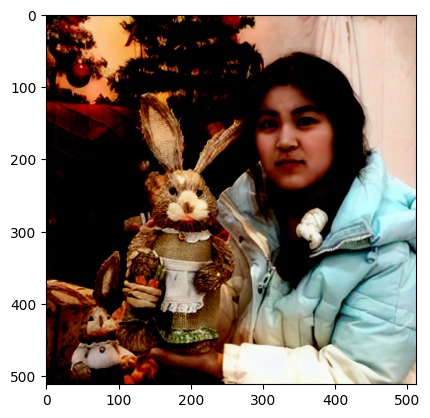

1.0457724 -1.2093599
[[[[-0.16100207  0.18135586  0.23109837 ...  0.7926697   0.77566075
     0.7985372 ]
   [-0.14292966  0.08892453  0.16334486 ...  0.7913335   0.793435
     0.8244028 ]
   [-0.14825654  0.01131116 -0.0221578  ...  0.7906985   0.7973212
     0.8230122 ]
   ...
   [-0.03597316  0.06802183  0.0418389  ...  0.94320613  0.9633963
     0.94228065]
   [-0.04902244  0.04867899 -0.11066613 ...  0.95167226  0.9489296
     0.9335984 ]
   [-0.0823678  -0.08314324 -0.03235596 ...  0.9407705   0.95909095
     0.9048666 ]]

  [[-0.32958034 -0.05296825 -0.00691207 ...  0.64982253  0.6548078
     0.695658  ]
   [-0.32342213 -0.11975401 -0.07656033 ...  0.6498603   0.6465678
     0.6833081 ]
   [-0.32967496 -0.1918875  -0.22769764 ...  0.6493819   0.65439034
     0.68138146]
   ...
   [-0.33925453 -0.2658001  -0.34720075 ...  0.8725264   0.868325
     0.88301367]
   [-0.32558438 -0.30330992 -0.52124965 ...  0.8759213   0.86772555
     0.86538357]
   [-0.33360407 -0.46394512 -0.542979

In [35]:
imageDecoded = imageDecodedDirect.detach().cpu().numpy()
plt.imshow(imageDecoded[0].transpose(1,2,0).clip(0,1)) 
plt.show()
print(imageDecoded.max(),imageDecoded.min())
print(imageDecoded)

0.8802104 0.25386918
[[[0.32774413 0.44748896 0.45042282]
  [0.3919925  0.4246425  0.38983062]
  [0.38927302 0.48857847 0.4302297 ]
  ...
  [0.4638625  0.5710038  0.44697133]
  [0.4453236  0.50688463 0.43918246]
  [0.50607    0.5417459  0.4191034 ]]

 [[0.35801047 0.46298027 0.45129895]
  [0.42624047 0.5078582  0.45798337]
  [0.35700464 0.554716   0.4630863 ]
  ...
  [0.5061177  0.5930493  0.47597075]
  [0.54909074 0.5393151  0.49417865]
  [0.46110305 0.46526518 0.504998  ]]

 [[0.33181894 0.49541482 0.5475381 ]
  [0.36868522 0.5548465  0.459355  ]
  [0.41409314 0.6191678  0.5240302 ]
  ...
  [0.56381565 0.5771426  0.42888847]
  [0.48116183 0.50548434 0.38839695]
  [0.4449597  0.51205164 0.46005857]]

 ...

 [[0.34412855 0.45166427 0.47763664]
  [0.4579423  0.45884642 0.44066203]
  [0.4907721  0.54711646 0.47451025]
  ...
  [0.53736454 0.57259715 0.43078938]
  [0.47877175 0.4812753  0.41524285]
  [0.46286198 0.5042886  0.43762392]]

 [[0.37343937 0.4573723  0.42263263]
  [0.5334965  0.

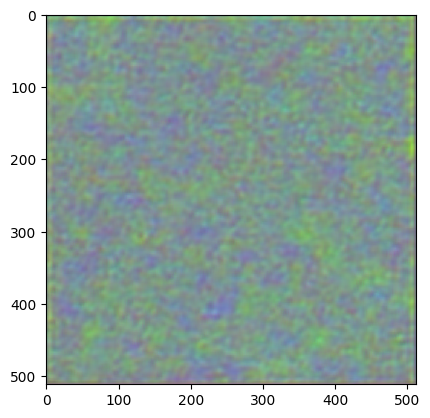

In [30]:
print(imageToShow.max(),imageToShow.min())
print(imageToShow)
plt.imshow(imageToShow,vmin=0,vmax=1)
plt.show()

In [4]:
time = torch.tensor(100)
timeEmbedding320 = Utils.getTimeEmbedding(time.cpu())    
timeEmbedding320= torch.tensor(timeEmbedding320,dtype=torch.float32).to(device)

modelNoisedLatentInput = latentNoised
contextInput = clipOutputs

print(f'latnet input {modelNoisedLatentInput.shape} {modelNoisedLatentInput}')
print(f'context input {contextInput.shape} {contextInput}')
print(f'time embedding320{timeEmbedding320.shape} {timeEmbedding320}')
modelEstimatedNoiseInlatent  = diffusionProcess(modelNoisedLatentInput,contextInput,timeEmbedding320)

latnet input torch.Size([1, 4, 64, 64]) tensor([[[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
          [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
          [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
          ...,
          [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
          [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
          [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

         [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
          [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
          [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
          ...,
          [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
          [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
          [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

         [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, 

In [5]:
sampler = DdpmSampler(randomGenerator=None,numTrainingSteps=1000,numInferenceSteps=50)
timesteps = sampler.getInferenceTimeSteps()    
print(timesteps)

[980 960 940 920 900 880 860 840 820 800 780 760 740 720 700 680 660 640
 620 600 580 560 540 520 500 480 460 440 420 400 380 360 340 320 300 280
 260 240 220 200 180 160 140 120 100  80  60  40  20   0]


In [15]:
print(modelNoisedLatentInput.dtype)   # should be torch.float32
print(contextInput.dtype)      # should be torch.float32
print(timeEmbedding320.dtype)  # should be torch.float32
print(modelNoisedLatentInput.shape)   # should be torch.float32
print(contextInput.shape)      # should be torch.float32
print(timeEmbedding320.shape)  # should be torch.float32

torch.float32
torch.float32
torch.float32
torch.Size([1, 4, 64, 64])
torch.Size([1, 77, 768])
torch.Size([1, 320])


In [3]:
import torch
a = torch.tensor(1)
a.flatten()

tensor([1])

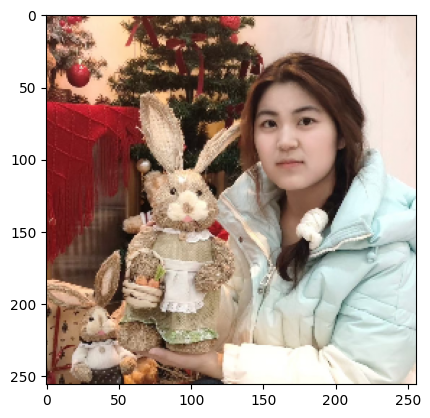

torch.Size([3, 512, 512])


In [23]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
from torchvision import transforms
img1 = cv2.imread('./images/pusiyue_front_1024_1024.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1,(0,0),fx = 1/4,fy = 1/4)
img1 = img1/255.0
plt.imshow(img1)
plt.show()
preprocess = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((512,512)),
                transforms.ToTensor(),
                transforms.Normalize(mean = [0.5, 0.5, 0.5], std = [0.5, 0.5, 0.5])
                ])
imagePreprocessed = preprocess(img1)
print(imagePreprocessed.shape)

-40
0.0108819426580401


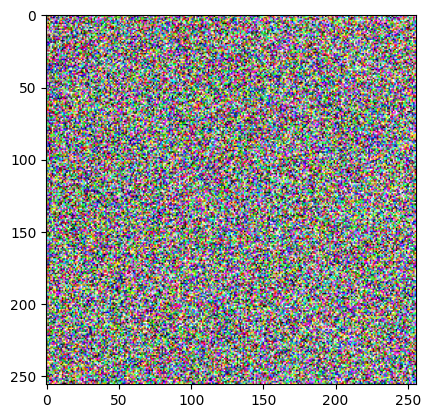

In [32]:

import StableDiffusion.DdpmSampler
import importlib
import StableDiffusion.Utils
from StableDiffusion.DdpmSampler import DdpmSampler
importlib.reload(StableDiffusion.DdpmSampler)
sampler = DdpmSampler()

print(sampler.getPreviusTimeStep(-20))
print(sampler.getVariance(900))
noisedImage =(img1-0.5)*2
noisedImage = sampler.addNoise(img1[None],800)
noisedImage = noisedImage*0.5+0.5
noisedImage = noisedImage.clip(0,1)
plt.imshow(noisedImage[0])
plt.show()

-40
0.0108819426580401


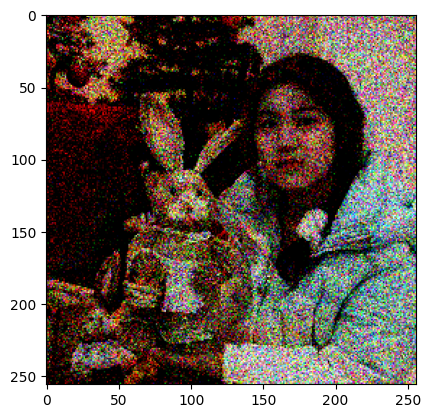

In [44]:
import StableDiffusion.DdpmSampler
import importlib
import StableDiffusion.Utils
from StableDiffusion.DdpmSampler import DdpmSampler
importlib.reload(StableDiffusion.DdpmSampler)
sampler = DdpmSampler()

print(sampler.getPreviusTimeStep(-20))
print(sampler.getVariance(900))
noisedImage =(img1-0.5)*2
noisedImage = sampler.addNoise(latentInputs= noisedImage,timeStep = 100)
noise = np.random.randn(*noisedImage.shape)
denoisedImage = sampler.removeNoiseFromLatent(latentInputs= noisedImage,estimateNoise= noise,timeStep = 100)
noisedImage = denoisedImage
noisedImage =(noisedImage-0.5)*2
#noisedImage = sampler.addNoise(img1[None],800)
noisedImage = noisedImage*0.5+0.5
noisedImage = noisedImage.clip(0,1)
plt.imshow(noisedImage)
plt.show()

In [11]:
a = torch.randn(2,4,64,64)
b,c = a.chunk(2,dim=0)
print(a.shape,b.shape,c.shape)
a = cfgScale*b +(1-cfgScale)*c
print(a.shape)

torch.Size([2, 4, 64, 64]) torch.Size([1, 4, 64, 64]) torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])


In [2]:
import torch
from StableDiffusion.UnetDenoise import UnetDenoise
unet = UnetDenoise()
latent = torch.randn(2, 4, 64, 64)
context = torch.randn(2, 77, 768)   
time = torch.randn(1, 1280)
result = unet(latent, context, time)
print(result.shape) 


unet global cross attention block foward pass hertorch.Size([2, 320, 4096])
unet global cross attention block foward pass hertorch.Size([2, 320, 4096])
unet global cross attention block foward pass hertorch.Size([2, 640, 1024])
unet global cross attention block foward pass hertorch.Size([2, 640, 1024])
unet global cross attention block foward pass hertorch.Size([2, 1280, 256])
unet global cross attention block foward pass hertorch.Size([2, 1280, 256])
unet global cross attention block foward pass hertorch.Size([2, 1280, 64])
unet global cross attention block foward pass hertorch.Size([2, 1280, 256])
unet global cross attention block foward pass hertorch.Size([2, 1280, 256])
unet global cross attention block foward pass hertorch.Size([2, 1280, 256])
unet global cross attention block foward pass hertorch.Size([2, 640, 1024])
unet global cross attention block foward pass hertorch.Size([2, 640, 1024])
unet global cross attention block foward pass hertorch.Size([2, 640, 1024])
unet global c